<a href="https://colab.research.google.com/github/iamBehzad/Complex-Networks/blob/main/ComplexNetwork14010212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author : Behzad Abbasi - 1401-02-25 - IAU Shabestar 

In [ ]:
import networkx as nx
import random

# Random Model #1

Nodes =  [10, 0, 1, 2, 3, 8, 7, 4, 5, 6, 9]
Nodes Degree =  [(10, 7), (0, 7), (1, 6), (2, 8), (3, 5), (8, 7), (7, 5), (4, 5), (5, 2), (6, 4), (9, 6)]
Nodes Size =  [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
Edges =  [(10, 1), (10, 6), (10, 8), (10, 0), (10, 2), (10, 4), (10, 7), (0, 1), (0, 2), (0, 3), (0, 7), (0, 8), (0, 9), (1, 2), (1, 5), (1, 8), (1, 9), (2, 3), (2, 8), (2, 6), (2, 7), (2, 9), (3, 7), (3, 8), (3, 4), (8, 4), (8, 6), (7, 9), (4, 5), (4, 9), (6, 9)]
Color Map =  ['r', 'g', 'b', 'y', 'm', 'r', 'g', 'b', 'y', 'm', 'r']


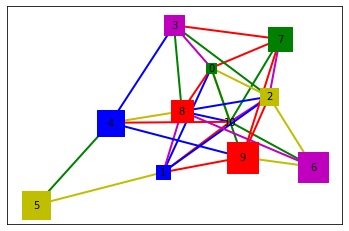

In [ ]:
n=10
p=0.3
g=nx.Graph()
g.add_node(n)
color_map = []
node_sizes = []
colors = ['r','g','b','y','m']
for i in range(0,n+1):
  node_sizes.append( 100 * i )
  color_map.append( colors[i%5] )
  for j in range(0,n+1):
    if i==j:
      continue
    r=random.random()
    if(r<=p):
      g.add_edge(i,j)
print("Nodes = " ,g.nodes)
print("Nodes Degree = " ,g.degree)
print("Nodes Size = " , node_sizes)
print("Edges = " ,g.edges)
print("Color Map = " ,color_map)

nx.draw_networkx(g,node_size = node_sizes, node_color=color_map , edge_color = color_map, width=2, node_shape="s",font_size=10, font_family='sans-serif')  


# Random Model #2

Nodes =  [10, 7, 2, 6, 3, 5, 8, 1, 4, 9]
Edges =  [(10, 5), (10, 2), (10, 9), (10, 1), (10, 4), (10, 8), (10, 7), (10, 3), (7, 2), (7, 8), (7, 9), (7, 4), (7, 1), (7, 3), (7, 5), (2, 3), (2, 5), (2, 8), (2, 9), (2, 4), (2, 6), (6, 3), (6, 8), (6, 5), (6, 9), (6, 1), (3, 4), (3, 8), (3, 1), (3, 5), (3, 9), (5, 1), (5, 9), (5, 8), (8, 1), (8, 4), (8, 9), (1, 4), (1, 9), (4, 9)]


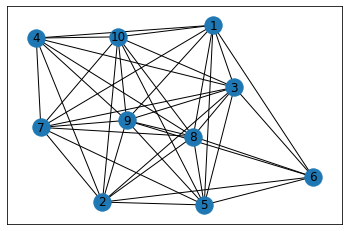

In [ ]:
n=10
m=100
p=0.3
Nodes=range(1,n+1)
g=nx.Graph()
g.add_node(n)
for i in range(0,m):
  s=random.choice(Nodes)
  t=random.choice(Nodes)
  while (s==t):
      t=random.choice(Nodes)
  g.add_edge(s,t)
print("Nodes = " ,g.nodes)
print("Edges = " ,g.edges)
nx.draw_networkx(g)

# Small World Model

In [ ]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

In [ ]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

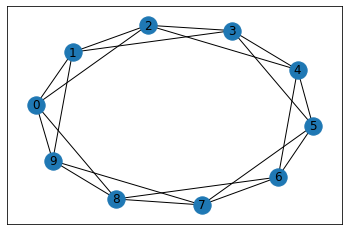

In [ ]:
lattice = make_ring_lattice(10, 4)
nx.draw_networkx(lattice)

In [ ]:

def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)